# Melakukan Pengecekan Data Quality

In [1]:
#Membaca Dataset
import pandas as pd
data = pd.read_csv("D:/docu/sem-7/PBA/emails.csv")

In [2]:
#Membaca jumlah row dan column dataset
print("Dataset memiliki {} rows dan {} columns".format(data.shape[0], data.shape[1]))

Dataset memiliki 5728 rows dan 2 columns


In [3]:
data.sample(10)

,text,spam
1869,"Subject: meeting requested hi mr . kaminski ,...",0
3510,"Subject: re : d - g energy karla , the wordi...",0
5574,"Subject: enron opportunities lynn , i am for...",0
4722,Subject: re : new invoice for energy and weath...,0
572,"Subject: ouur medz hello , welcome to pharmon...",1
4361,"Subject: re : meeting tuesday dale , your me...",0
3505,Subject: re : mg metals : additional areas to ...,0
1242,Subject: save your money buy getting this thin...,1
415,Subject: new extensions now only $ 14 . 95 pu...,1
1477,Subject: enron alp dear alp company represent...,0


In [4]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
total = data.isnull().sum().sort_values(ascending=False)
nilai_null = pd.concat([total], axis=1, keys=['Total'])

In [6]:
nilai_null

,Total
spam,0
text,0


## Text Prepocessing


In [7]:
data['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

### Menghapus punctuation


In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punc(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct
data['text'] = data['text'].apply(remove_punc)

In [10]:
data['text']

0       Subject naturally irresistible your corporate ...
1       Subject the stock trading gunslinger  fanny is...
2       Subject unbelievable new homes made easy  im w...
3       Subject 4 color printing special  request addi...
4       Subject do not have money  get software cds fr...
                              ...                        
5723    Subject re  research and development charges t...
5724    Subject re  receipts from visit  jim   thanks ...
5725    Subject re  enron case study update  wow  all ...
5726    Subject re  interest  david   please  call shi...
5727    Subject news  aurora 5  2 update  aurora versi...
Name: text, Length: 5728, dtype: object

### Stemming 

In [11]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

data['text'] = data['text'].apply(stemming)

In [12]:
data['text']

0       Subject naturally irresistible your corporate ...
1       Subject the stock trading gunslinger  fanny is...
2       Subject unbelievable new homes made easy  im w...
3       Subject 4 color printing special  request addi...
4       Subject do not have money  get software cds fr...
                              ...                        
5723    Subject re  research and development charges t...
5724    Subject re  receipts from visit  jim   thanks ...
5725    Subject re  enron case study update  wow  all ...
5726    Subject re  interest  david   please  call shi...
5727    Subject news  aurora 5  2 update  aurora versi...
Name: text, Length: 5728, dtype: object

In [13]:
data.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


In [14]:
data.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4326  Subject re  weather and energy price data  mul...    2
1     1368   1368  Subject instant branded software download  sof...    1

In [15]:
data['Category'] = data['spam'].apply(lambda x: 'spam' if x== 1 else 'ham')
data.head()

,text,spam,Category
0,Subject naturally irresistible your corporate ...,1,spam
1,Subject the stock trading gunslinger fanny is...,1,spam
2,Subject unbelievable new homes made easy im w...,1,spam
3,Subject 4 color printing special request addi...,1,spam
4,Subject do not have money get software cds fr...,1,spam


### Melakukan split data 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_vectorizer = vectorizer.fit_transform(data['text'])
print(text_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Melakukan split data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text_vectorizer,data['Category'],test_size=0.20)

### Membangun Model Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [19]:
emails = [
    ' wall street phenomenon reaps rewards  small - cap stock finder  new developments expected to move'
]
emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array(['spam'], dtype='<U4')

### Melakukan Evaluasi Model

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.99      1.00       876
        spam       0.98      0.99      0.99       270

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



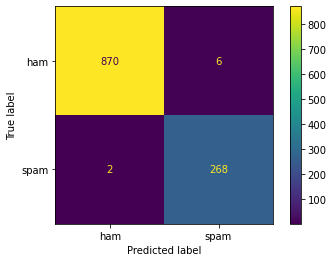

In [23]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(model,X_test,y_test)


In [25]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5,shuffle = True)
print("Akurasi model dengan Cross Validation adalah :", np.mean(cross_val_score(
model,text_vectorizer,data['Category'], cv = kfold,scoring="accuracy" ))*100, "%")

Akurasi model dengan Cross Validation adalah : 98.93509225176615 %
